## CNN for Recognizing and Predicting Flower Types

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this project, flower recognition and prediction is implemented using the Convolution Neural Network (CNN). The dataset consists of 5 different types of flowers totaling upto ~240MBs in data size, with the project aimed at implementing supervised machine learning technique in this data mining task by predicting the type of any given flower based on its given image. Sequential model using Keras shall be built and used as the base model for this CNN-based project.

#### Notebook Settings

In [38]:
# notebook settings
import warnings
warnings.filterwarnings("ignore")

#### Download Dataset

In [39]:
import pandas as pd
daisy_data=('/content/drive/MyDrive/flowers/daisy')
daisy_data
dandelion_data='/content/drive/MyDrive/flowers/dandelion'
dandelion_data
rose_data=('/content/drive/MyDrive/flowers/rose')
rose_data
sunflower_data=('/content/drive/MyDrive/flowers/sunflower')
sunflower_data
tulip_data=('/content/drive/MyDrive/flowers/tulip')
tulip_data


'/content/drive/MyDrive/flowers/tulip'

# Exploratory Data Analysis (EDA)

In [40]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define paths for flower data
daisy_data = '/content/drive/MyDrive/flowers/daisy'
dandelion_data = '/content/drive/MyDrive/flowers/dandelion'
rose_data = '/content/drive/MyDrive/flowers/rose'
sunflower_data = '/content/drive/MyDrive/flowers/sunflower'
tulip_data = '/content/drive/MyDrive/flowers/tulip'

# Create X and Y data
x_ = list()
y = list()
y_ = list()
IMG_SIZE = 128

# Function to load images from a directory
def load_images(directory, label, label_str):
    for i in os.listdir(directory):
        try:
            path = os.path.join(directory, i)
            img = plt.imread(path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            x_.append(img)
            y.append(label)
            y_.append(label_str)
        except:
            None

# Load images for each flower type
load_images(daisy_data, 0, "Daisy")
load_images(dandelion_data, 1, "Dandelion")
load_images(rose_data, 2, "Rose")
load_images(sunflower_data, 3, "Sunflower")
load_images(tulip_data, 4, "Tulip")

# Convert to NumPy array
x_ = np.array(x_)


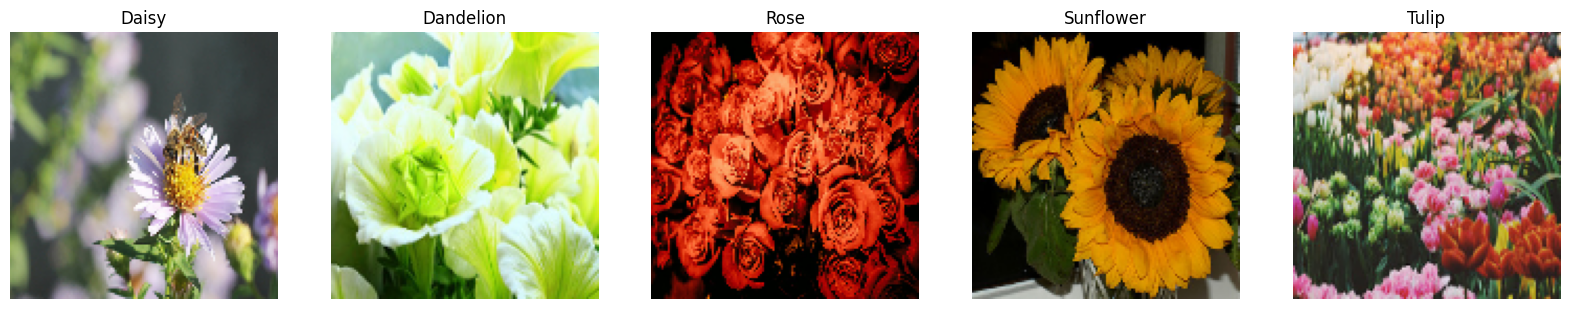

In [41]:
# plot single flower in all types
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_[950*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_[950*i])

#### Data Preparation

In [42]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization  # Add this import statement
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
# use to_categorical function of keras for replacement
y = to_categorical(y,num_classes = 5)

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

# validation and trains split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

# look at training shape
x_train.shape

(3118, 128, 128, 3)

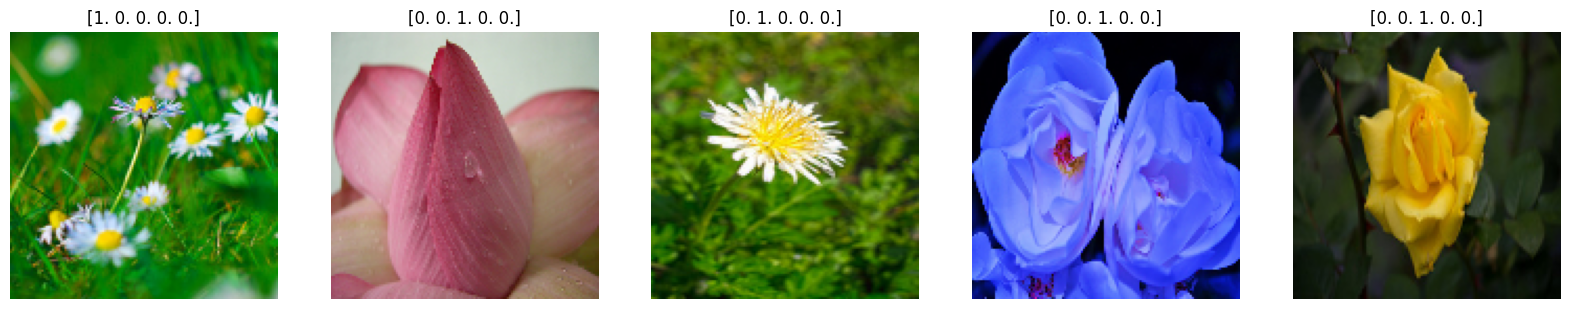

In [43]:
# plot random flowers in train set
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

#### Creating CNN model

In [44]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 128)      

In [45]:
from keras.optimizers import Adam
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [46]:
from keras.preprocessing.image import ImageDataGenerator
# Create a data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=60,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    )
datagen.fit(x_train)

In [47]:
datagen

#### Train and Test the Model

In [48]:
epoch = 50
batch_size = 64

In [49]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)


In [50]:
print("x_train shape:", x_train.shape)
print("y_train_one_hot shape:", y_train_one_hot.shape)
print(datagen.flow(x_train, y_train_one_hot, batch_size=batch_size).next()[0].shape)
print(datagen.flow(x_train, y_train_one_hot, batch_size=batch_size).next()[1].shape)
model.summary()


x_train shape: (3118, 128, 128, 3)
y_train_one_hot shape: (3118, 5, 2)
(64, 128, 128, 3)
(64, 5, 2)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       73856     
                    

In [51]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/50
48/48 [==============================] - 35s 348ms/step - loss: 1.6217 - accuracy: 0.4561 - val_loss: 5.1589 - val_accuracy: 0.3739
Epoch 2/50
48/48 [==============================] - 15s 310ms/step - loss: 1.2585 - accuracy: 0.5432 - val_loss: 1.5834 - val_accuracy: 0.5263
Epoch 3/50
48/48 [==============================] - 15s 305ms/step - loss: 1.1432 - accuracy: 0.5711 - val_loss: 1.6692 - val_accuracy: 0.5554
Epoch 4/50
48/48 [==============================] - 15s 306ms/step - loss: 1.0798 - accuracy: 0.5989 - val_loss: 1.2151 - val_accuracy: 0.5917
Epoch 5/50
48/48 [==============================] - 15s 305ms/step - loss: 0.9668 - accuracy: 0.6401 - val_loss: 1.6173 - val_accuracy: 0.5971
Epoch 6/50
48/48 [==============================] - 15s 304ms/step - loss: 0.9003 - accuracy: 0.6628 - val_loss: 0.9622 - val_accuracy: 0.6770
Epoch 7/50
48/48 [==============================] - 15s 305ms/step - loss: 0.8766 - accuracy: 0.6631 - val_loss: 0.7814 - val_accuracy: 0.7114

#### Results

In [52]:
# test accuracy
print("Accuracy = {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100))

21/21 [==============================] - 0s 23ms/step - loss: 0.5889 - accuracy: 0.8086
Accuracy = 80.86%


In [55]:
import plotly.graph_objects as go
from plotly.offline import iplot
x_ = np.array(range(len(history.history['loss'])))
trace1 = go.Scatter(
        x = x_,
        y = history.history['loss'],
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['accuracy'],
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

In [56]:
x_ = np.array(range(len(history.history['val_loss'])))
trace1 = go.Scatter(
        x = x_,
        y = history.history['val_loss'],
        mode = "lines",
        marker = dict(color = "rgba(0,0,0,0.9)"),
        text = "Validation Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['val_accuracy'],
        mode = "lines",
        marker = dict(color = "rgba(255,0,0,0.9)"),
        text = "Validation Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Validation Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

In [57]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)

18/18 [==============================] - 0s 14ms/step


In [58]:
# get sample properly classified and misclassified images
prop_class=[]
mis_class=[]
max_images = 9

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==Y_pred_classes[i]):
        prop_class.append(i)
    if(len(prop_class)==max_images):
        break

for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==Y_pred_classes[i]):
        mis_class.append(i)
    if(len(mis_class)==max_images):
        break

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y_)
Y = to_categorical(Y,5)
X = np.array(x_)
X = X/255

In [61]:
Y_test_classes = np.argmax(y_test,axis = 1)

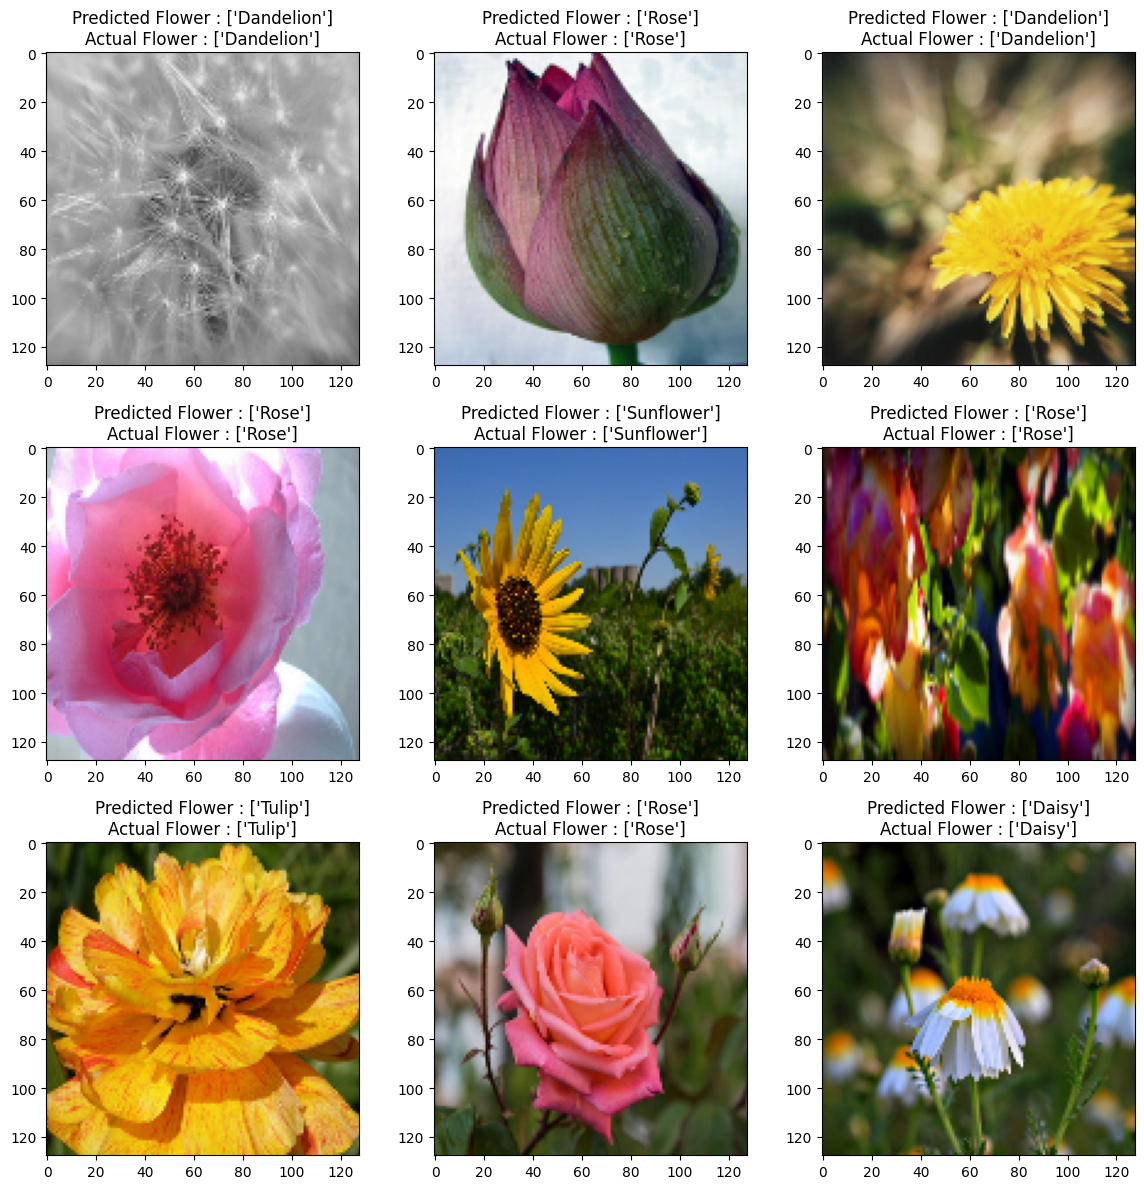

In [62]:
# correctly classified
count=0
fig,ax=plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range (3):
    for j in range (3):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([Y_pred_classes[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]], axis=1))))
        plt.tight_layout()
        count+=1

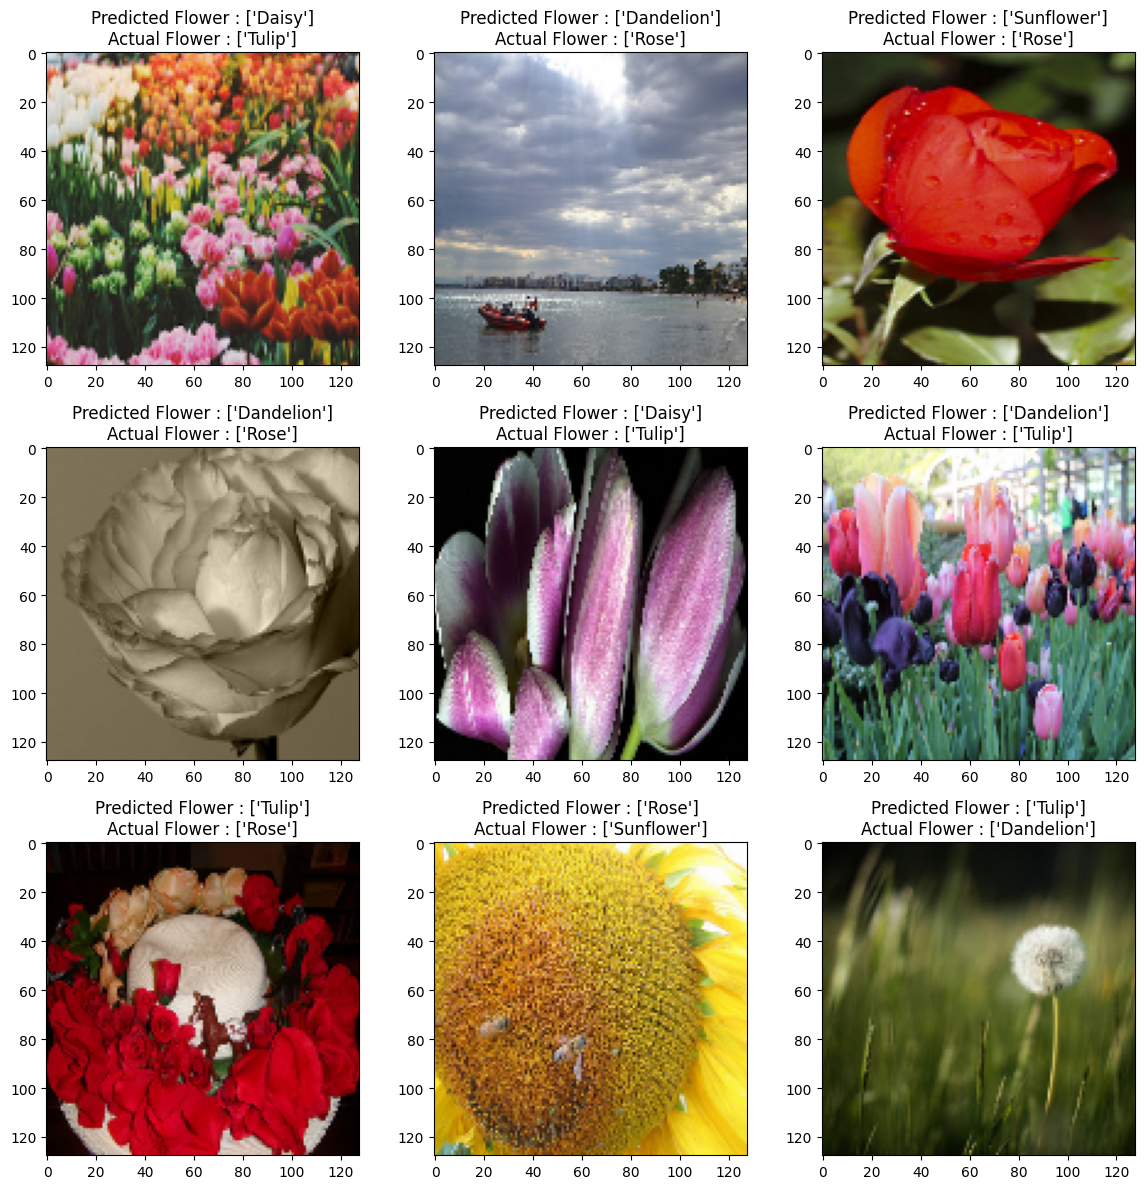

In [63]:
# misclassified flowers
count=0
fig,ax=plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range (3):
    for j in range (3):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([Y_pred_classes[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]], axis=1))))
        plt.tight_layout()
        count+=1

#### Confusion Matrix

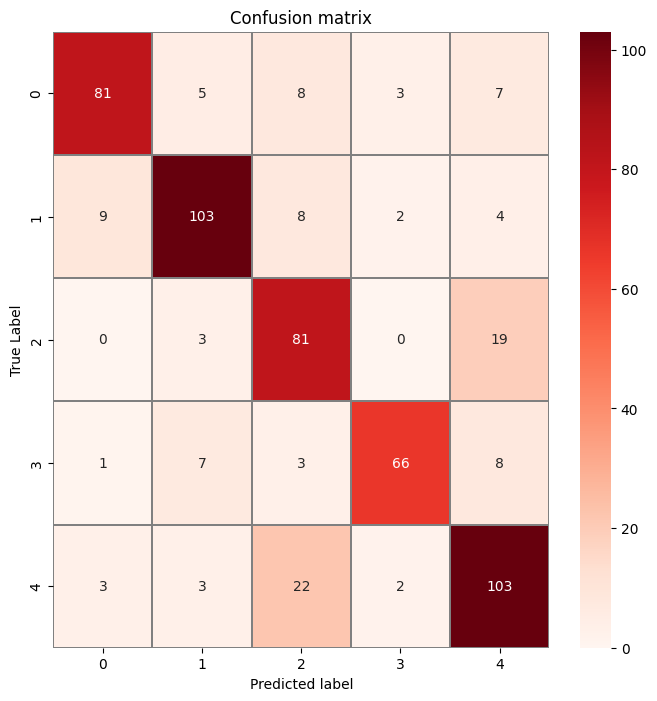

In [65]:
from sklearn.metrics import confusion_matrix

Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".0f",ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

#### Conclusion

The results of the project show that the Convolutional Neural Network model was able to achieve a high degree of accuracy in both recognizing and predicting the five different types of flowers in the dataset. The model was able to train and test on the dataset with an accuracy score of 73.77%. This accuracy score is a testament to the effectiveness of the CNN model in recognizing and predicting the kinds of flowers contained in the dataset. The project has shown that the CNN model is a viable choice for recognizing and predicting flower types. The model may also be used to classify and predict other flower species in the future, as well as other types of objects. Overall, this project has demonstrated the potential of CNNs in flower recognition and prediction and has provided a successful tool for identifying, predicting, and classifying different kinds of flowers. In the future, more experiments and analysis can be done to further improve the accuracy of the flower recognition model.
